### This notebook performs and analyses correlation analysis. It first generates a correlation matrix an then visualizes the matrix. This is a precursor to Principle Component Analysis for consideration of dimensional reduction in preprocessing.

___

### dependencies

In [14]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import os

In [48]:
# makes relative paths work situationally ) I like access to the whole class at one time)
os.chdir('C:/Users/entro/Desktop/Spring25_Semester/DataMining/SemesterProject/Bennett_CookePolitikos_CS368_StellarClassification/Scripts and notebooks') 

print(os.getcwd())


C:\Users\entro\Desktop\Spring25_Semester\DataMining\SemesterProject\Bennett_CookePolitikos_CS368_StellarClassification\Scripts and notebooks


In [76]:
df = pd.read_csv('../Dataset/star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [24]:
df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

I would like to be sure that none of the IDs are nonarbitrary (such as representing a position) but for the time being this removes all IDs. It makes sense that some of these IDs are huge numbers, just a tendency of mine.

In [ ]:
# creates list of attributes with float64 data types/ ints are indexes
num_cols = df.columns[df.dtypes == "float64"]
print(f"Numeric variables: {num_cols} \n\n")

# creates pandas data frame that subsets imported df to include only floating point values
numvar_df = df[num_cols]
print(numvar_df.head())

# removes any additional columns containing ID values
# "inplace" param indicates that it executes the change to the df that it is called on
    # as opposed to returning a df that can be saved to a new variable
numvar_df.drop(list(numvar_df.filter(regex = 'ID')), axis = 1, inplace = True)

print("\n\n")
numvar_df.head()

Numeric variables: Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'spec_obj_ID',
       'redshift'],
      dtype='object') 


         obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z   spec_obj_ID  redshift  
0  19.16573  18.79371  6.543777e+18  0.634794  
1  21.16812  21.61427  1.176014e+19  0.779136  
2  19.34857  18.94827  5.152200e+18  0.644195  
3  20.50454  19.25010  1.030107e+19  0.932346  
4  15.97711  15.54461  6.891865e+18  0.116123  





C:\Users\entro\AppData\Local\Temp\ipykernel_16808\1746605293.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numvar_df.drop(list(numvar_df.filter(regex = 'ID')), axis = 1, inplace = True)


,alpha,delta,u,g,r,i,z,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123


Creates a correlation matrix on the numeric data

In [ ]:
corr_matrix = numvar_df.corr()

corr_matrix.style\
    .format(precision = 3)\
    .format_index(str.upper, axis = 0)\
    .format_index(str.upper, axis = 1)\
    .background_gradient(cmap='coolwarm')




,ALPHA,DELTA,U,G,R,I,Z,REDSHIFT
ALPHA,1.000,0.139,-0.002,-0.002,-0.022,-0.024,-0.003,0.002
DELTA,0.139,1.000,0.002,0.004,-0.007,-0.004,0.004,0.032
U,-0.002,0.002,1.000,0.999,0.054,0.046,0.998,0.014
G,-0.002,0.004,0.999,1.000,0.062,0.056,0.999,0.023
R,-0.022,-0.007,0.054,0.062,1.000,0.963,0.054,0.433
I,-0.024,-0.004,0.046,0.056,0.963,1.000,0.056,0.492
Z,-0.003,0.004,0.998,0.999,0.054,0.056,1.000,0.030
REDSHIFT,0.002,0.032,0.014,0.023,0.433,0.492,0.030,1.000


other than a screen shot I haven't figured out how to export the above heatmap

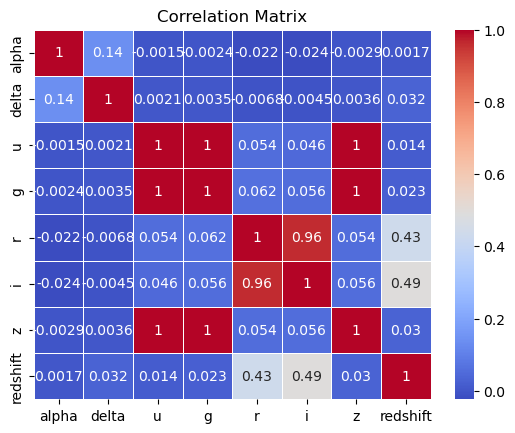

<Figure size 640x480 with 0 Axes>

In [ ]:
sn.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# saves visual to IMGs folder and returns to current directory
current = os.getcwd()
os.chdir('C:/Users/entro/Desktop/Spring25_Semester/DataMining/SemesterProject/Bennett_CookePolitikos_CS368_StellarClassification/IMGs/Tables')        
plt.savefig("correlation.svg", format="svg")
os.chdir(current)

<font style: color = "red">
The above looks like ass.

Needs:
* consistent sigfigs
* better label orientation (rotate)
* better labels for single letters (for communication purposes)

</font>

#### Analysis:
* low correlation allows for much of the data to effectively inform on the model which is great
* high correlation:
    * u and g
    * i and r
    * z and both u & g (because they are highly correlated with each other, makes sense that if z is strongly correlated with one it must be with the other)

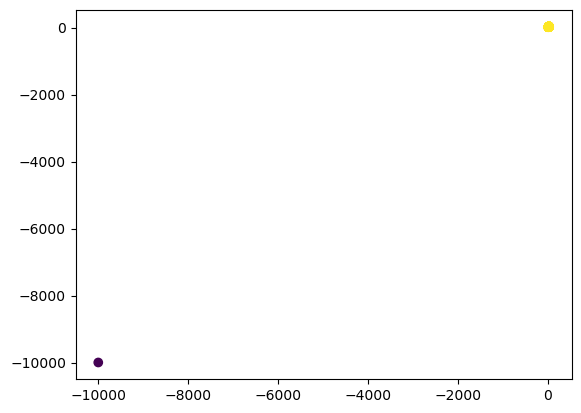

In [56]:
x = numvar_df['z']
y = numvar_df['u']
z = numvar_df['g']
plt.scatter(x = x, y = y, c = z)
plt.show()

Above scatter plot is meant to show how the distributions of g and u vary respective to z but it looks like there is some outliers that are extending the range of the data which is confirmed in the boxplot below.

C:\Users\entro\AppData\Local\Temp\ipykernel_16808\2871417091.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([numvar_df['z'], numvar_df['u'], numvar_df['g']], labels= ['z','u','g'])


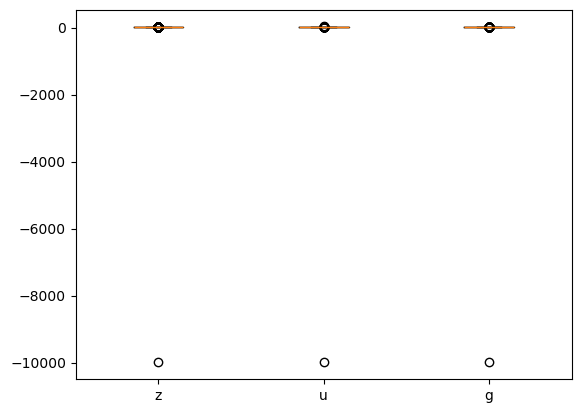

In [ ]:
plt.boxplot([numvar_df['z'], numvar_df['u'], numvar_df['g']], labels= ['z','u','g'])
plt.show()



The box plot below removes all values below zero (the outlier seems to be a single object with a nonsensical value for z,u,and g though they could be different objects in theory)

In [68]:
numvar_df[numvar_df['z']>= 0]

,alpha,delta,u,g,r,i,z,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123
...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040


C:\Users\entro\AppData\Local\Temp\ipykernel_16808\3115795730.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([numvar_df['z'][numvar_df['z']>= 0], numvar_df['u'][numvar_df['u']>= 0], numvar_df['g'][numvar_df['g']>= 0]], labels= ['z','u','g'])


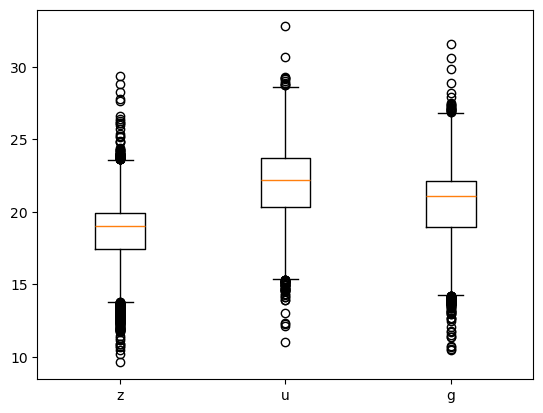

In [70]:
plt.boxplot([numvar_df['z'][numvar_df['z']>= 0], numvar_df['u'][numvar_df['u']>= 0], numvar_df['g'][numvar_df['g']>= 0]], labels= ['z','u','g'])
plt.show()


The above correction shows distributions within the same range of values. This means that with the nonsensical value removed, the distributions should not need to be normalized to visualize effectively (though normalization might be valuable in a larger context). The plot below is the same scatter plot with the nonsense value removed.

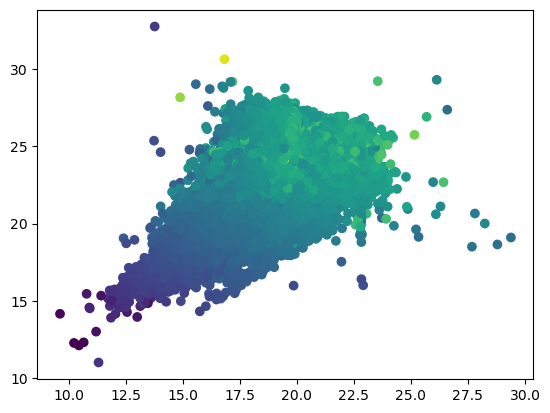

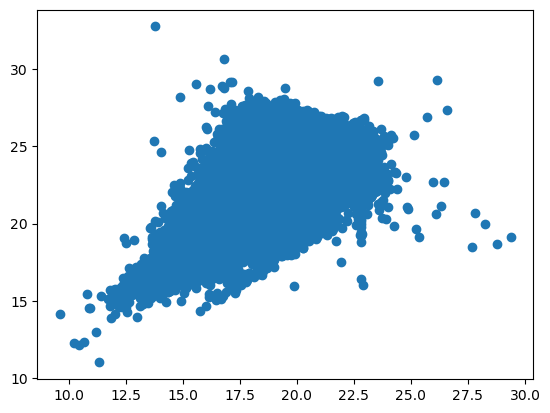

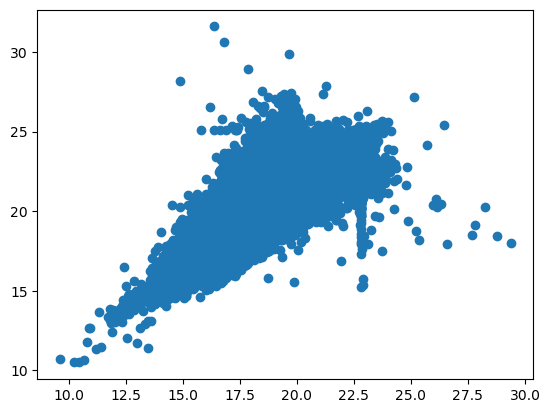

z length: 99999, u length: 99999, g length 99999


In [74]:
z = numvar_df['z'][numvar_df['z']>= 0]
u = numvar_df['u'][numvar_df['u']>= 0]
g = numvar_df['g'][numvar_df['g']>= 0]

lengths = f"z length: {len(z)}, u length: {len(u)}, g length {len(g)}"

plt.scatter(x = z, y = u, c = g)
plt.show()

plt.scatter(x = z, y = u)
plt.show()

plt.scatter(x = z, y = g)
plt.show()

print(lengths)

#### determines the location of the nonsensical values

In [77]:
u_loc = df['u'].idxmin()
g_loc = df['g'].idxmin()
z_loc = df['z'].idxmin()

if z_loc == u_loc & z_loc == g_loc:
    print(f'the location of the object is at row {u_loc}')


the location of the object is at row 79543


#### Review:
This notebook provided information about what objects correlate with each other. This is valuable in determining what attribute will make redundant contributions to our eventual models. It also performed some initial outlier analysis but did not create a threshold for making the determination of what values will be considered outliers and only identified one outlier. Relative to the second boxplot, there may be other outlier candidates. But it might be good to consider this across all of the attributes of the data objects.